In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
cities = ['ABZ', 'ALE', 'AMA', 'AMM', 'ASP', 'BEI', 'BOT', 'BSL', 'DEL', 'EGB',
          'HAD', 'HEL', 'HPB', 'HYY', 'KCE', 'KPZ', 'MAR', 'MHD', 'MLP', 'MUK', 
          'NAN', 'NEU', 'POV', 'SAO', 'SCH', 'SGP', 'UAE', 'VAR', 'VIE', 'WAL', 
          'ZOT']

In [48]:
data = pd.read_csv('data/full_data.csv', parse_dates=['date'])
data.head()

,id,station,date,n100,latitude,longitude,aermr01,aermr02,aermr03,aermr04,...,blh,co,c5h8,no2,no,so2,nh3,crwc,c10h16,rh
0,ABZ-2012-01-26,ABZ,2012-01-26,2708.085714,50.57,12.99,6.752697e-12,5.765684e-10,3.351248e-11,2.513737e-15,...,306.51462,3.418626e-07,1.845452e-11,2.060121e-08,1.302913e-08,6.464830e-09,8.448101e-10,0.0,2.113917e-10,87.716470
1,ABZ-2012-01-27,ABZ,2012-01-27,2489.175000,50.57,12.99,4.223335e-12,3.600730e-10,1.855095e-11,2.457708e-12,...,142.03300,3.787211e-07,2.230681e-11,2.199851e-08,1.489063e-08,7.113044e-09,1.008734e-09,0.0,2.499145e-10,85.013445
2,ABZ-2012-01-28,ABZ,2012-01-28,3484.229167,50.57,12.99,3.553853e-12,3.007895e-10,2.072250e-10,2.348849e-11,...,152.80160,5.185500e-07,3.481757e-11,1.887175e-08,3.310498e-08,7.495814e-09,1.407371e-09,0.0,4.513248e-10,90.074210
3,ABZ-2012-01-29,ABZ,2012-01-29,2977.512500,50.57,12.99,8.665312e-12,7.307493e-10,5.219741e-11,1.661040e-10,...,461.47455,3.129840e-07,1.296726e-11,1.569601e-08,4.424891e-09,4.929475e-09,1.466395e-09,0.0,1.150862e-10,85.875228
4,ABZ-2012-01-30,ABZ,2012-01-30,2702.463636,50.57,12.99,1.436837e-11,1.208825e-09,5.724685e-11,1.925855e-10,...,610.29910,2.414889e-07,8.755192e-12,1.345031e-08,1.021235e-09,5.219232e-09,1.477080e-09,0.0,4.446712e-11,71.525093


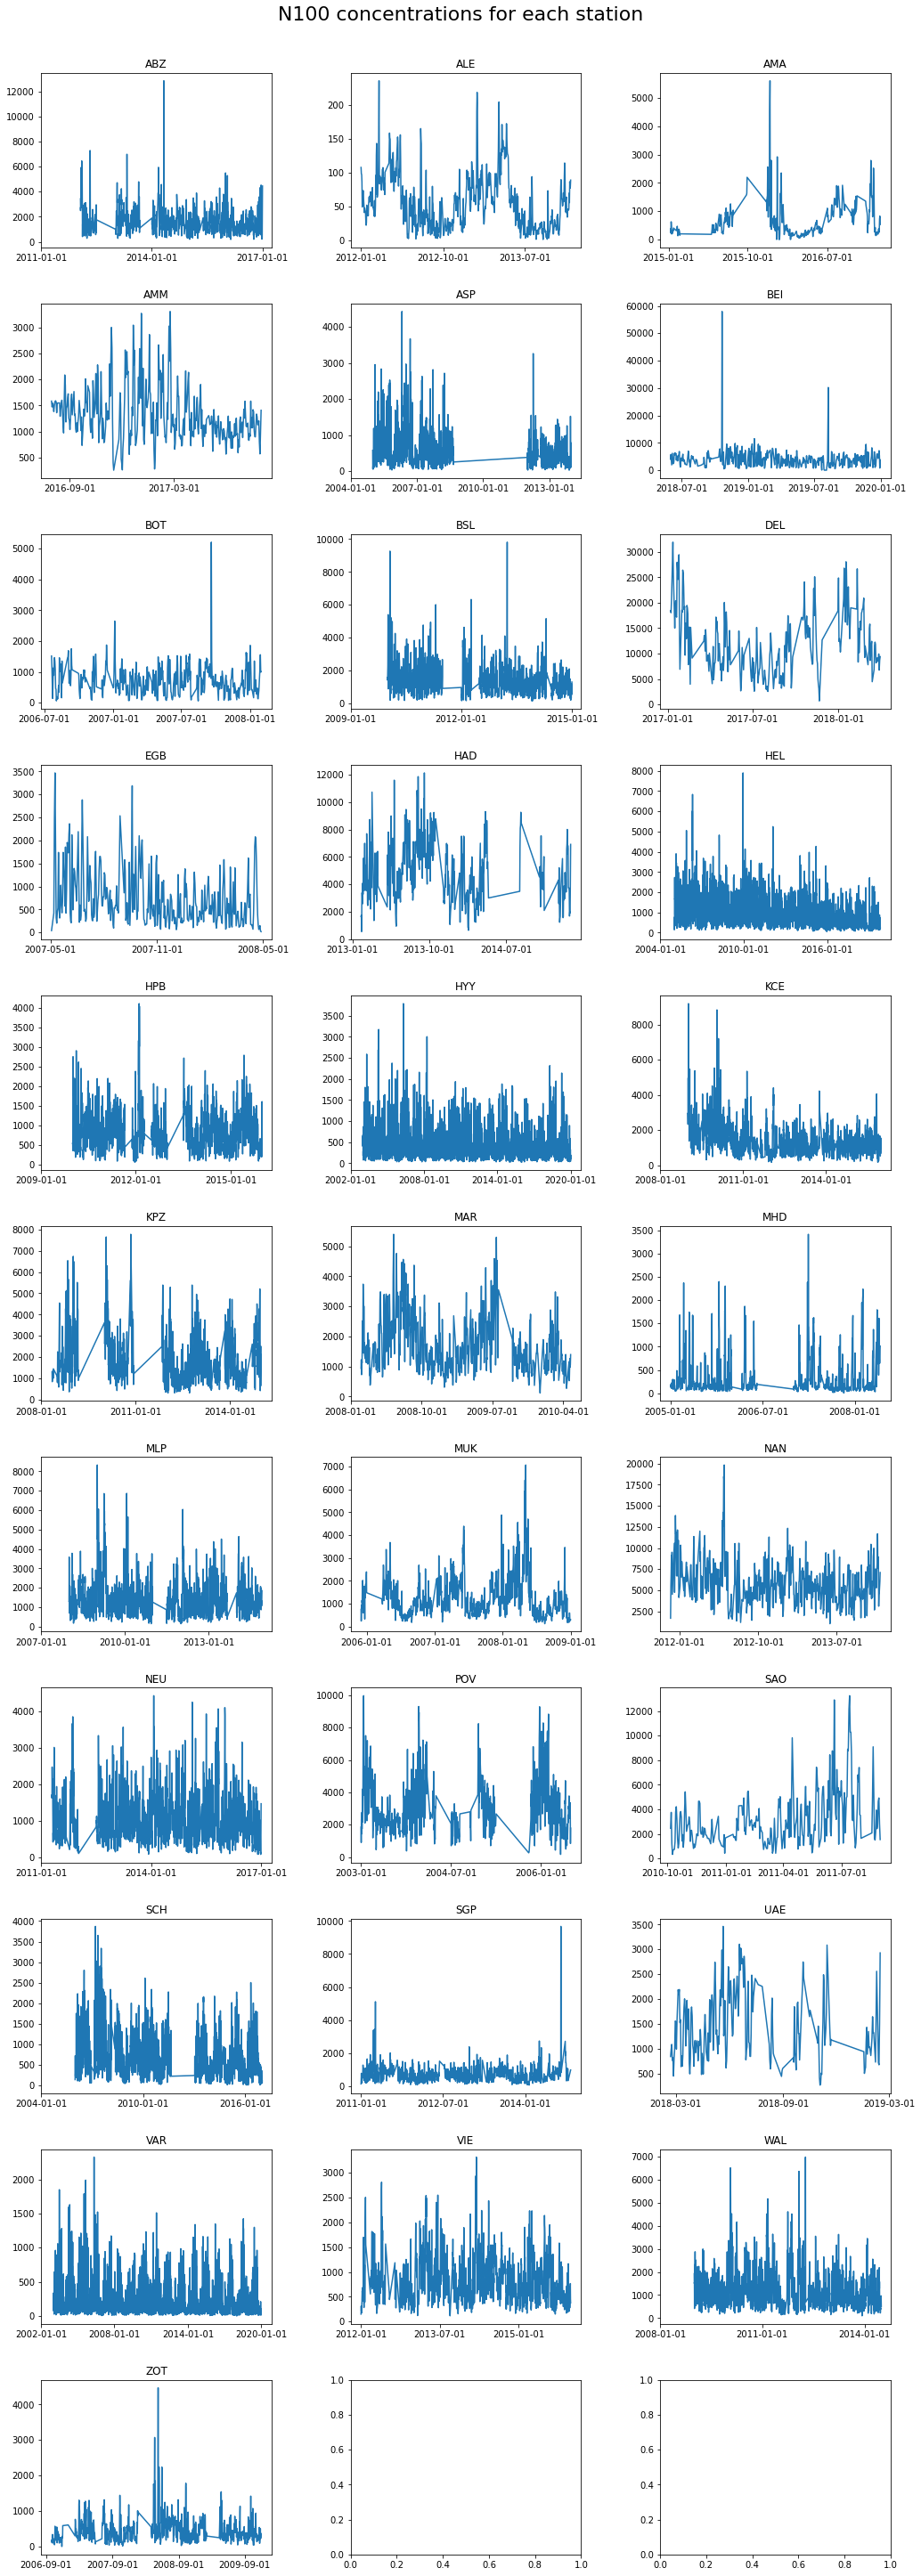

In [49]:
fig, axes = plt.subplots(11,3, figsize=(15,40))
axes = iter(axes)
i = 0

for c in cities:
    if i%3 == 0:
        axis = next(axes)
    ax = axis[i%3]
    
    ax.plot(data.date.loc[data.station == c], data.n100.loc[data.station == c])
    ax.set_title(c)
    ax.set_xticks(ax.get_xticks()[::3])
    
    i += 1
    
fig.tight_layout(pad=3)
fig.suptitle('N100 concentrations for each station', y=1.01, fontsize=22);

In [82]:
variable_dict = {'n100': 'N100 concentration',
                 'aermr01': 'Sea salt aerosol (0.03 - 0.5 µm)\nmixing ratio',
                 'aermr02': 'Sea salt aerosol (0.5 - 5 µm)\nmixing ratio',
                 'aermr03': 'Sea salt aerosol (5 - 20 µm)\nmixing ratio',
                 'aermr04': 'Dust aerosol (0.03 - 0.55 µm)\nmixing ratio',
                 'aermr05': 'Dust aerosol (0.55 - 0.9 µm)\nmixing ratio',
                 'aermr06': 'Dust aerosol (0.9 - 20 µm)\nmixing ratio',
                 'aermr07': 'Hydrophilic organic matter\naerosol mixing ratio',
                 'aermr08': 'Hydrophobic organic matter\naerosol mixing ratio',
                 'aermr09': 'Hydrophilic black carbon\naerosol mixing ratio',
                 'aermr10': 'Hydrophobic black carbon\naerosol mixing ratio',
#                  'aermr11': 'Sulphate aerosol\nmixing ratio',
                 'co': 'Carbon monoxide',
                 'c5h8': 'Isoprene',
                 'c10h16': 'Terpenes',
                 'nh3': 'Ammonia',
                 'no': 'Nitrogen monoxide',
                 'no2': 'Nitrogen dioxide',
                 'so2': 'Sulphur dioxide',
                 'd2m': 'Dew point temperature\nat 2m height',
                 't2m': 'Air temperature\nat 2m height',
                 'crwc': 'Specific rain water content',
                 'blh': 'Boundary layer height',
                 'rh': 'Relative humidity'}

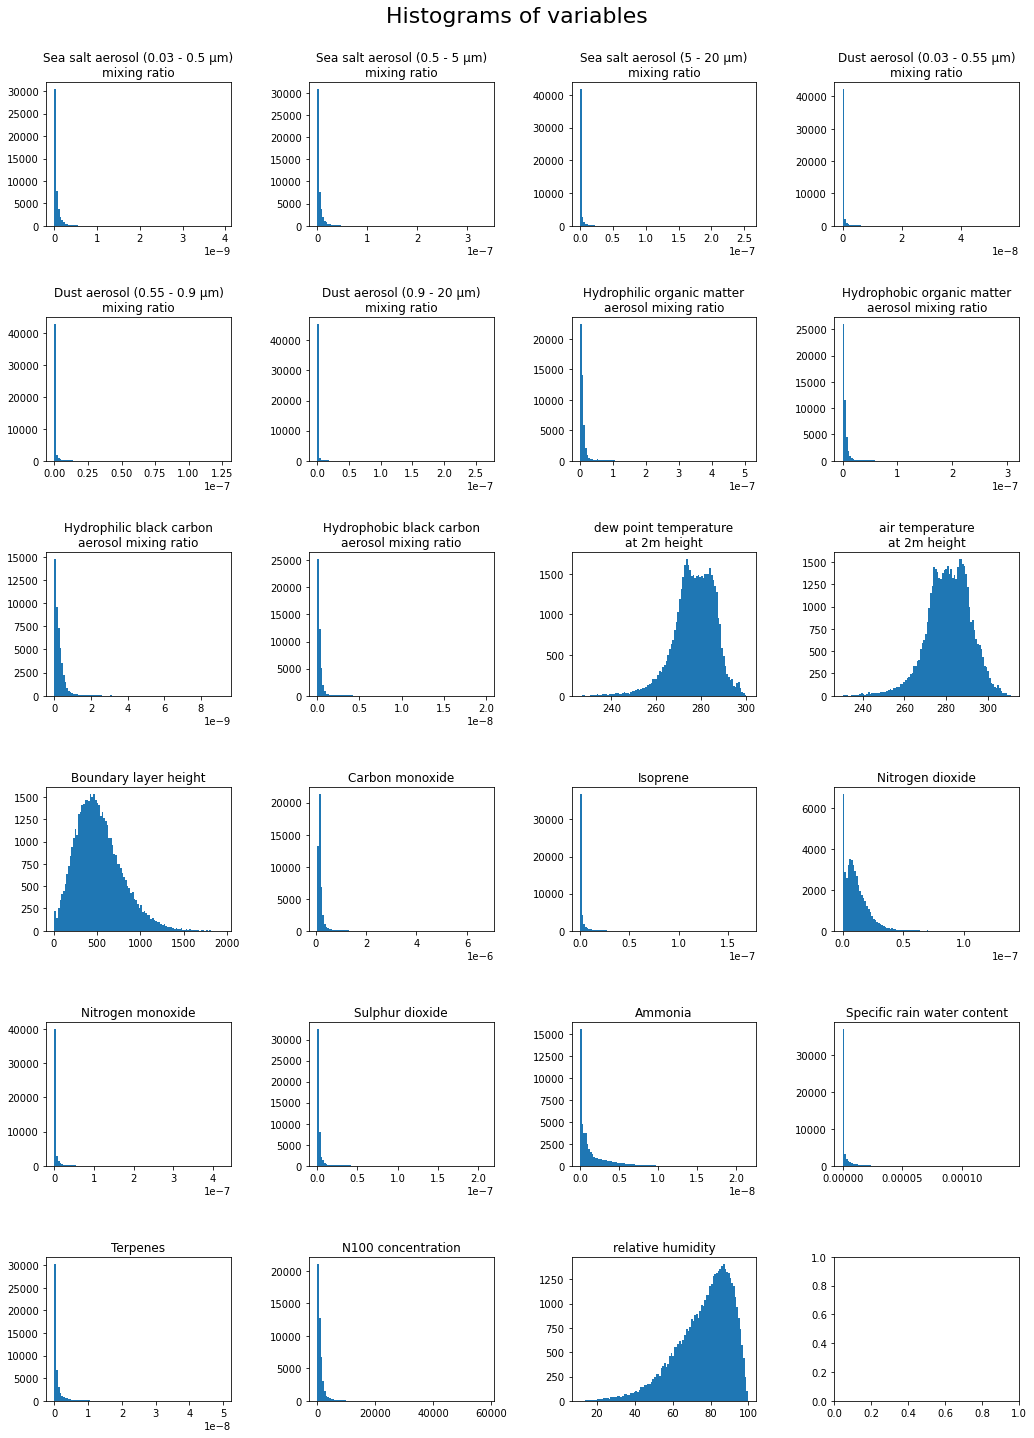

In [51]:
fig, axes = plt.subplots(6, 4, figsize=(15,20))
axes = iter(axes)
i = 0

for v in variable_dict.keys():
    if i%4 == 0:
        axis = next(axes)
    ax = axis[i%4]
    ax.hist(data[v], bins=100)
    ax.set_title(variable_dict[v])
    i += 1
    
fig.tight_layout(pad=3)
fig.suptitle('Histograms of variables', y=1.01, fontsize=22);

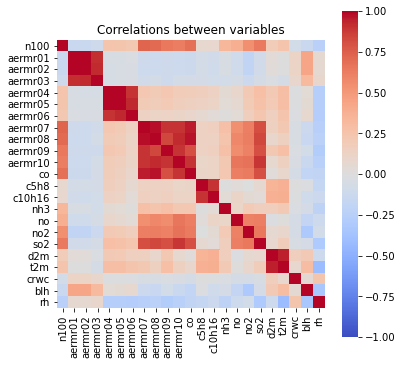

In [87]:
plt.figure(figsize=(6,6))
sns.heatmap(data[variable_dict.keys()].corr(), xticklabels=variable_dict.keys(), yticklabels=variable_dict.keys(), 
            cmap='coolwarm', cbar=True, square=True, vmin=-1, vmax=1)
plt.title('Correlations between variables');

In [83]:
transf_data = data.copy()

for v in variable_dict.keys():
    if v not in ['d2m', 't2m', 'blh', 'n100', 'rh']:
        transformed = transf_data[v]
        transformed = transformed.where(transformed != transformed.min(), transformed.nlargest(2).iloc[-1])
        transf_data[v] = np.log(transformed)

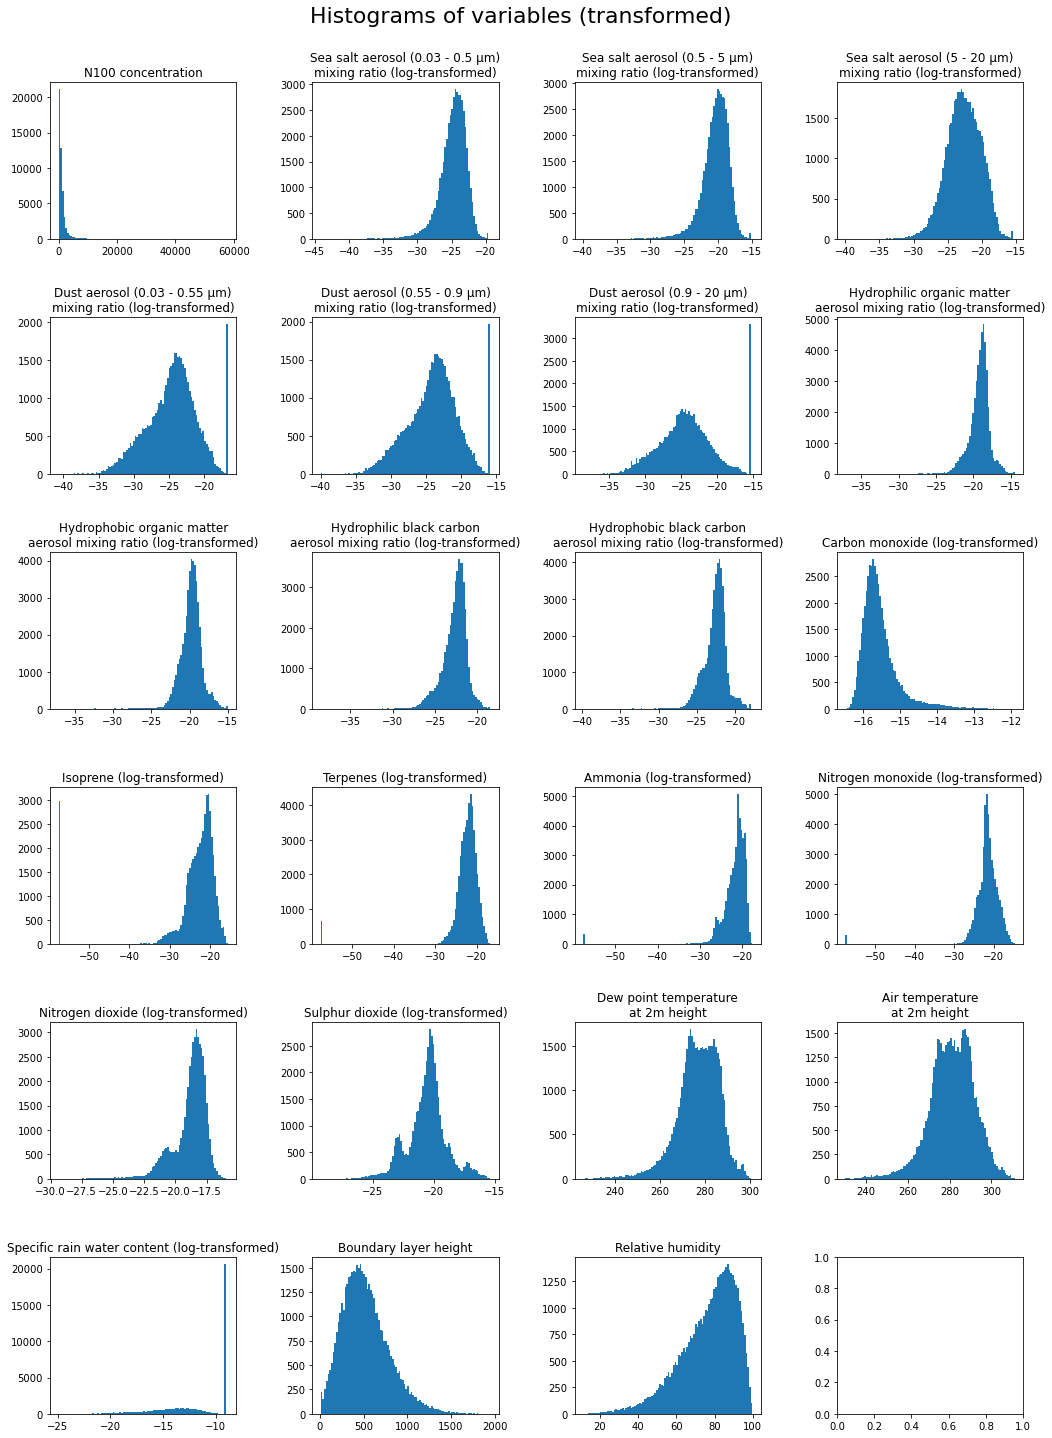

In [84]:
fig, axes = plt.subplots(6, 4, figsize=(15,20))
axes = iter(axes)
i = 0

for v in variable_dict.keys():
    if i%4 == 0:
        axis = next(axes)
    ax = axis[i%4]
    ax.hist(transf_data[v], bins=100)
    
    if v in ['d2m', 't2m', 'blh', 'n100', 'rh']:
        ax.set_title(variable_dict[v])
    else:
        ax.set_title(variable_dict[v]+' (log-transformed)')
    i += 1
    
fig.tight_layout(pad=3)
fig.suptitle('Histograms of variables (transformed)', y=1.01, fontsize=22);

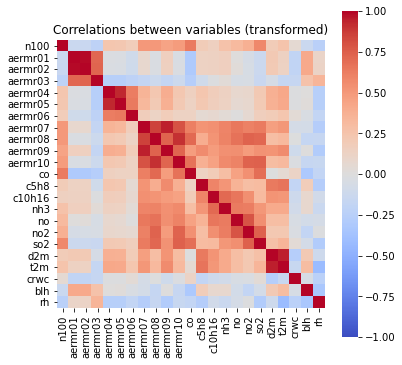

In [89]:
plt.figure(figsize=(6,6))
sns.heatmap(transf_data[variable_dict.keys()].corr(), 
            xticklabels=variable_dict.keys(), yticklabels=variable_dict.keys(), 
            cmap='coolwarm', cbar=True, square=True, vmin=-1, vmax=1)
plt.title('Correlations between variables (transformed)');

In [112]:
print('Strongest correlations of variables with N100 (before and after transforming):')

for n in list(variable_dict.keys())[1:]:
    corr = np.round(pearsonr(data[n], data.n100), 3)
    transf_corr = np.round(pearsonr(transf_data[n], transf_data.n100), 3)   
    if transf_corr[0] > corr[0]:
        print(n, corr, transf_corr, 'corr higher with transformed data')
    else:
        print(n, corr, transf_corr)

Strongest correlations of variables with N100 (before and after transforming):
aermr01 [-0.139  0.   ] [-0.138  0.   ] corr higher with transformed data
aermr02 [-0.14  0.  ] [-0.142  0.   ]
aermr03 [-0.109  0.   ] [-0.214  0.   ]
aermr04 [0.256 0.   ] [0.238 0.   ]
aermr05 [0.244 0.   ] [0.232 0.   ]
aermr06 [0.225 0.   ] [0.183 0.   ]
aermr07 [0.733 0.   ] [0.506 0.   ]
aermr08 [0.715 0.   ] [0.5 0. ]
aermr09 [0.65 0.  ] [0.453 0.   ]
aermr10 [0.626 0.   ] [0.487 0.   ]
co [0.68 0.  ] [0.634 0.   ]
c5h8 [0.072 0.   ] [0.194 0.   ] corr higher with transformed data
c10h16 [0.078 0.   ] [0.155 0.   ] corr higher with transformed data
nh3 [0.339 0.   ] [0.258 0.   ]
no [0.387 0.   ] [0.32 0.  ]
no2 [0.554 0.   ] [0.378 0.   ]
so2 [0.641 0.   ] [0.578 0.   ]
d2m [0.193 0.   ] [0.193 0.   ]
t2m [0.256 0.   ] [0.256 0.   ]
crwc [-0.08  0.  ] [0.061 0.   ] corr higher with transformed data
blh [-0.134  0.   ] [-0.134  0.   ]
rh [-0.241  0.   ] [-0.241  0.   ]
